In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

## Import data

In [2]:
file_path = "stem_results.xlsx"

In [3]:
sps1_emissions = "SPS1 - emissions"
sps1_sources = "SPS1 - e generation"
sps4_emissions = "SPS4 - emissions"
sps4_sources = "SPS4 - e generation"

In [4]:
df_sps1_emissions = pd.read_excel(file_path, sheet_name=sps1_emissions)
df_sps1_sources = pd.read_excel(file_path, sheet_name=sps1_sources)
df_sps4_emissions = pd.read_excel(file_path, sheet_name=sps4_emissions)
df_sps4_sources = pd.read_excel(file_path, sheet_name=sps4_sources)

In [5]:
df_sps1_sources

,SPS,Region,Sector,unit,2020,2022,2025,2030,2040,2050
0,SPS1,CH,Coal,PJ/yr.,3.660000,3.560737,3.237455,0.000365,0.000000,0.000000
1,SPS1,CH,Oil (fossil liquids),PJ/yr.,305.537717,277.625167,234.743482,139.307082,57.565217,0.000000
2,SPS1,CH,Oil (synthetic liquids),PJ/yr.,6.913297,7.421807,6.900671,5.961934,9.882039,26.112295
3,SPS1,CH,Gas (fossil),PJ/yr.,116.925568,106.720000,97.479622,107.673761,91.902475,54.898202
4,SPS1,CH,Gas (synthetic),PJ/yr.,0.000000,0.516500,0.899662,1.838399,1.729539,0.000000
5,SPS1,CH,Nuclear,PJ/yr.,250.948170,253.300110,176.997547,189.382509,98.945499,0.000000
6,SPS1,CH,Hydrogen,PJ/yr.,0.000000,0.000000,0.000000,0.000000,0.472193,1.425065
7,SPS1,CH,Wood,PJ/yr.,44.770000,47.260901,47.260901,47.260901,47.260901,63.755653
8,SPS1,CH,Waste (non renewable),PJ/yr.,35.611720,35.882383,35.762048,35.039995,35.159449,35.603173
9,SPS1,CH,Waste (renewable),PJ/yr.,33.781043,33.781043,33.781043,33.781043,33.781043,33.781043


## Apply cut off for "Other"

In [6]:
def apply_cutoff(df, cut_off):
    # Create a new DataFrame to store the categorized data
    df_categorized = df.copy()

    # Initialize an "Other" row if it doesn't exist
    if "Other" not in df_categorized["Sector"].values:
        other_row = pd.DataFrame({
            "SPS": [df["SPS"].iloc[0]],
            "Region": [df["Region"].iloc[0]],
            "Sector": ["Other"],
            "unit": [df["unit"].iloc[0]]
        })
        for col in df.columns[4:]:
            other_row[col] = 0
        df_categorized = pd.concat([df_categorized, other_row], ignore_index=True)

    # Loop over each year column to categorize variables
    for year in df.columns[4:]:
        total = df[year].sum()
        percentages = df[year].abs() / total

        # Identify variables that fall under the "Other" category
        other_sum = 0
        for i, percentage in percentages.items():
            if percentage < cut_off and df.at[i, year] >= 0:
                other_sum += df.at[i, year]
                df_categorized.at[i, year] = 0

        # # Debugging information
        # print(f"Year: {year}")
        # print(f"Total: {total}")
        # print(f"Percentages:\n{percentages}")
        # print(f"Other sum for year {year}: {other_sum}")

        # Update the "Other" row
        df_categorized.loc[df_categorized["Sector"] == "Other", year] += other_sum

    return df_categorized

In [7]:
cut_off = 0.05  # 5%

In [8]:
df_sps1_emissions_cutoff = apply_cutoff(df_sps1_emissions, cut_off)
df_sps1_sources_cutoff = apply_cutoff(df_sps1_sources, cut_off)
df_sps4_emissions_cutoff = apply_cutoff(df_sps4_emissions, cut_off)
df_sps4_sources_cutoff = apply_cutoff(df_sps4_sources, cut_off)

In [9]:
df_sps1_sources_cutoff

,SPS,Region,Sector,unit,2020,2022,2025,2030,2040,2050
0,SPS1,CH,Coal,PJ/yr.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,SPS1,CH,Oil (fossil liquids),PJ/yr.,305.537717,277.625167,234.743482,139.307082,57.565217,0.000000
2,SPS1,CH,Oil (synthetic liquids),PJ/yr.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,SPS1,CH,Gas (fossil),PJ/yr.,116.925568,106.720000,97.479622,107.673761,91.902475,54.898202
4,SPS1,CH,Gas (synthetic),PJ/yr.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,SPS1,CH,Nuclear,PJ/yr.,250.948170,253.300110,176.997547,189.382509,98.945499,0.000000
6,SPS1,CH,Hydrogen,PJ/yr.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,SPS1,CH,Wood,PJ/yr.,0.000000,47.260901,47.260901,47.260901,47.260901,63.755653
8,SPS1,CH,Waste (non renewable),PJ/yr.,0.000000,0.000000,0.000000,0.000000,35.159449,35.603173
9,SPS1,CH,Waste (renewable),PJ/yr.,0.000000,0.000000,0.000000,0.000000,33.781043,33.781043


In [10]:
# Remove rows where all values from 2020 to 2050 are zero
df_sps1_emissions_cutoff = df_sps1_emissions_cutoff[(df_sps1_emissions_cutoff.iloc[:, 4:] != 0).any(axis=1)]
df_sps1_sources_cutoff = df_sps1_sources_cutoff[(df_sps1_sources_cutoff.iloc[:, 4:] != 0).any(axis=1)]
df_sps4_emissions_cutoff = df_sps4_emissions_cutoff[(df_sps4_emissions_cutoff.iloc[:, 4:] != 0).any(axis=1)]
df_sps4_sources_cutoff = df_sps4_sources_cutoff[(df_sps4_sources_cutoff.iloc[:, 4:] != 0).any(axis=1)]

In [11]:
df_sps1_sources_cutoff

,SPS,Region,Sector,unit,2020,2022,2025,2030,2040,2050
1,SPS1,CH,Oil (fossil liquids),PJ/yr.,305.537717,277.625167,234.743482,139.307082,57.565217,0.000000
3,SPS1,CH,Gas (fossil),PJ/yr.,116.925568,106.720000,97.479622,107.673761,91.902475,54.898202
5,SPS1,CH,Nuclear,PJ/yr.,250.948170,253.300110,176.997547,189.382509,98.945499,0.000000
7,SPS1,CH,Wood,PJ/yr.,0.000000,47.260901,47.260901,47.260901,47.260901,63.755653
8,SPS1,CH,Waste (non renewable),PJ/yr.,0.000000,0.000000,0.000000,0.000000,35.159449,35.603173
9,SPS1,CH,Waste (renewable),PJ/yr.,0.000000,0.000000,0.000000,0.000000,33.781043,33.781043
11,SPS1,CH,Hydro,PJ/yr.,149.430480,125.603999,141.266673,150.312739,151.187702,151.986870
12,SPS1,CH,Solar,PJ/yr.,0.000000,0.000000,0.000000,0.000000,46.180755,102.869316
14,SPS1,CH,Ambient heat,PJ/yr.,0.000000,0.000000,0.000000,59.413646,80.797868,84.855949
16,SPS1,CH,Other,PJ/yr.,160.487596,129.953644,155.253917,122.340542,32.162055,61.017362


In [12]:
df_sps1_emissions_melted = df_sps1_emissions_cutoff.melt(
    id_vars=["SPS", "Region", "Sector", "unit"], 
    var_name="Year", 
    value_name="Value"
)
df_sps1_sources_melted = df_sps1_sources_cutoff.melt(
    id_vars=["SPS", "Region", "Sector", "unit"], 
    var_name="Year", 
    value_name="Value"
)

df_sps4_emissions_melted = df_sps4_emissions_cutoff.melt(
    id_vars=["SPS", "Region", "Sector", "unit"], 
    var_name="Year", 
    value_name="Value"
)
df_sps4_sources_melted = df_sps4_sources_cutoff.melt(
    id_vars=["SPS", "Region", "Sector", "unit"], 
    var_name="Year", 
    value_name="Value"
)

## Visualization

### Selecting the palette

In [13]:
sector_colors_sources = {
    "Oil (fossil liquids)": "midnightblue",
    "Gas (fossil)": "slateblue",
    "Nuclear": "forestgreen",
    "Wood": "darkgoldenrod",
    "Waste (non renewable)": "saddlebrown",
    "Waste (renewable)": "lightgreen",
    "Hydro": "lightblue",
    "Solar": "gold",
    "Ambient heat": "lightsalmon",
    "Other": "dimgray"
}

sector_colors_emissions = {
    "Industry": "slateblue",
    "Other": "dimgray",
    "Power generation": "saddlebrown",
    "Residential": "lightsalmon",
    "Services": "lightblue",
    "Synthetic fuel production": "lightgreen",
    "Transport": "midnightblue"
}

# # Create a consistent color map
# sectors = list(sector_colors.keys())
# colors = [sector_colors[sector] for sector in sectors]
# custom_colormap = ListedColormap(colors)

## Plotting

In [14]:
# Set default font size for all plot elements
plt.rcParams.update({'font.size': 32, 'font.family': 'Verdana'})

In [15]:
def plot_with_consistent_colors(df, ax, title, xlim, sector_colors):
    sectors = df.columns
    color_map = [sector_colors[sector] for sector in sectors]
    df.plot(kind='barh', stacked=True, ax=ax, color=color_map, zorder=3)
    ax.set_title(title, fontsize=32, pad=30)
    ax.set_xlim(xlim)
    ax.grid(True, zorder=0)
    for bar in ax.patches:
        bar.set_edgecolor('gray')
        bar.set_linewidth(0.7)

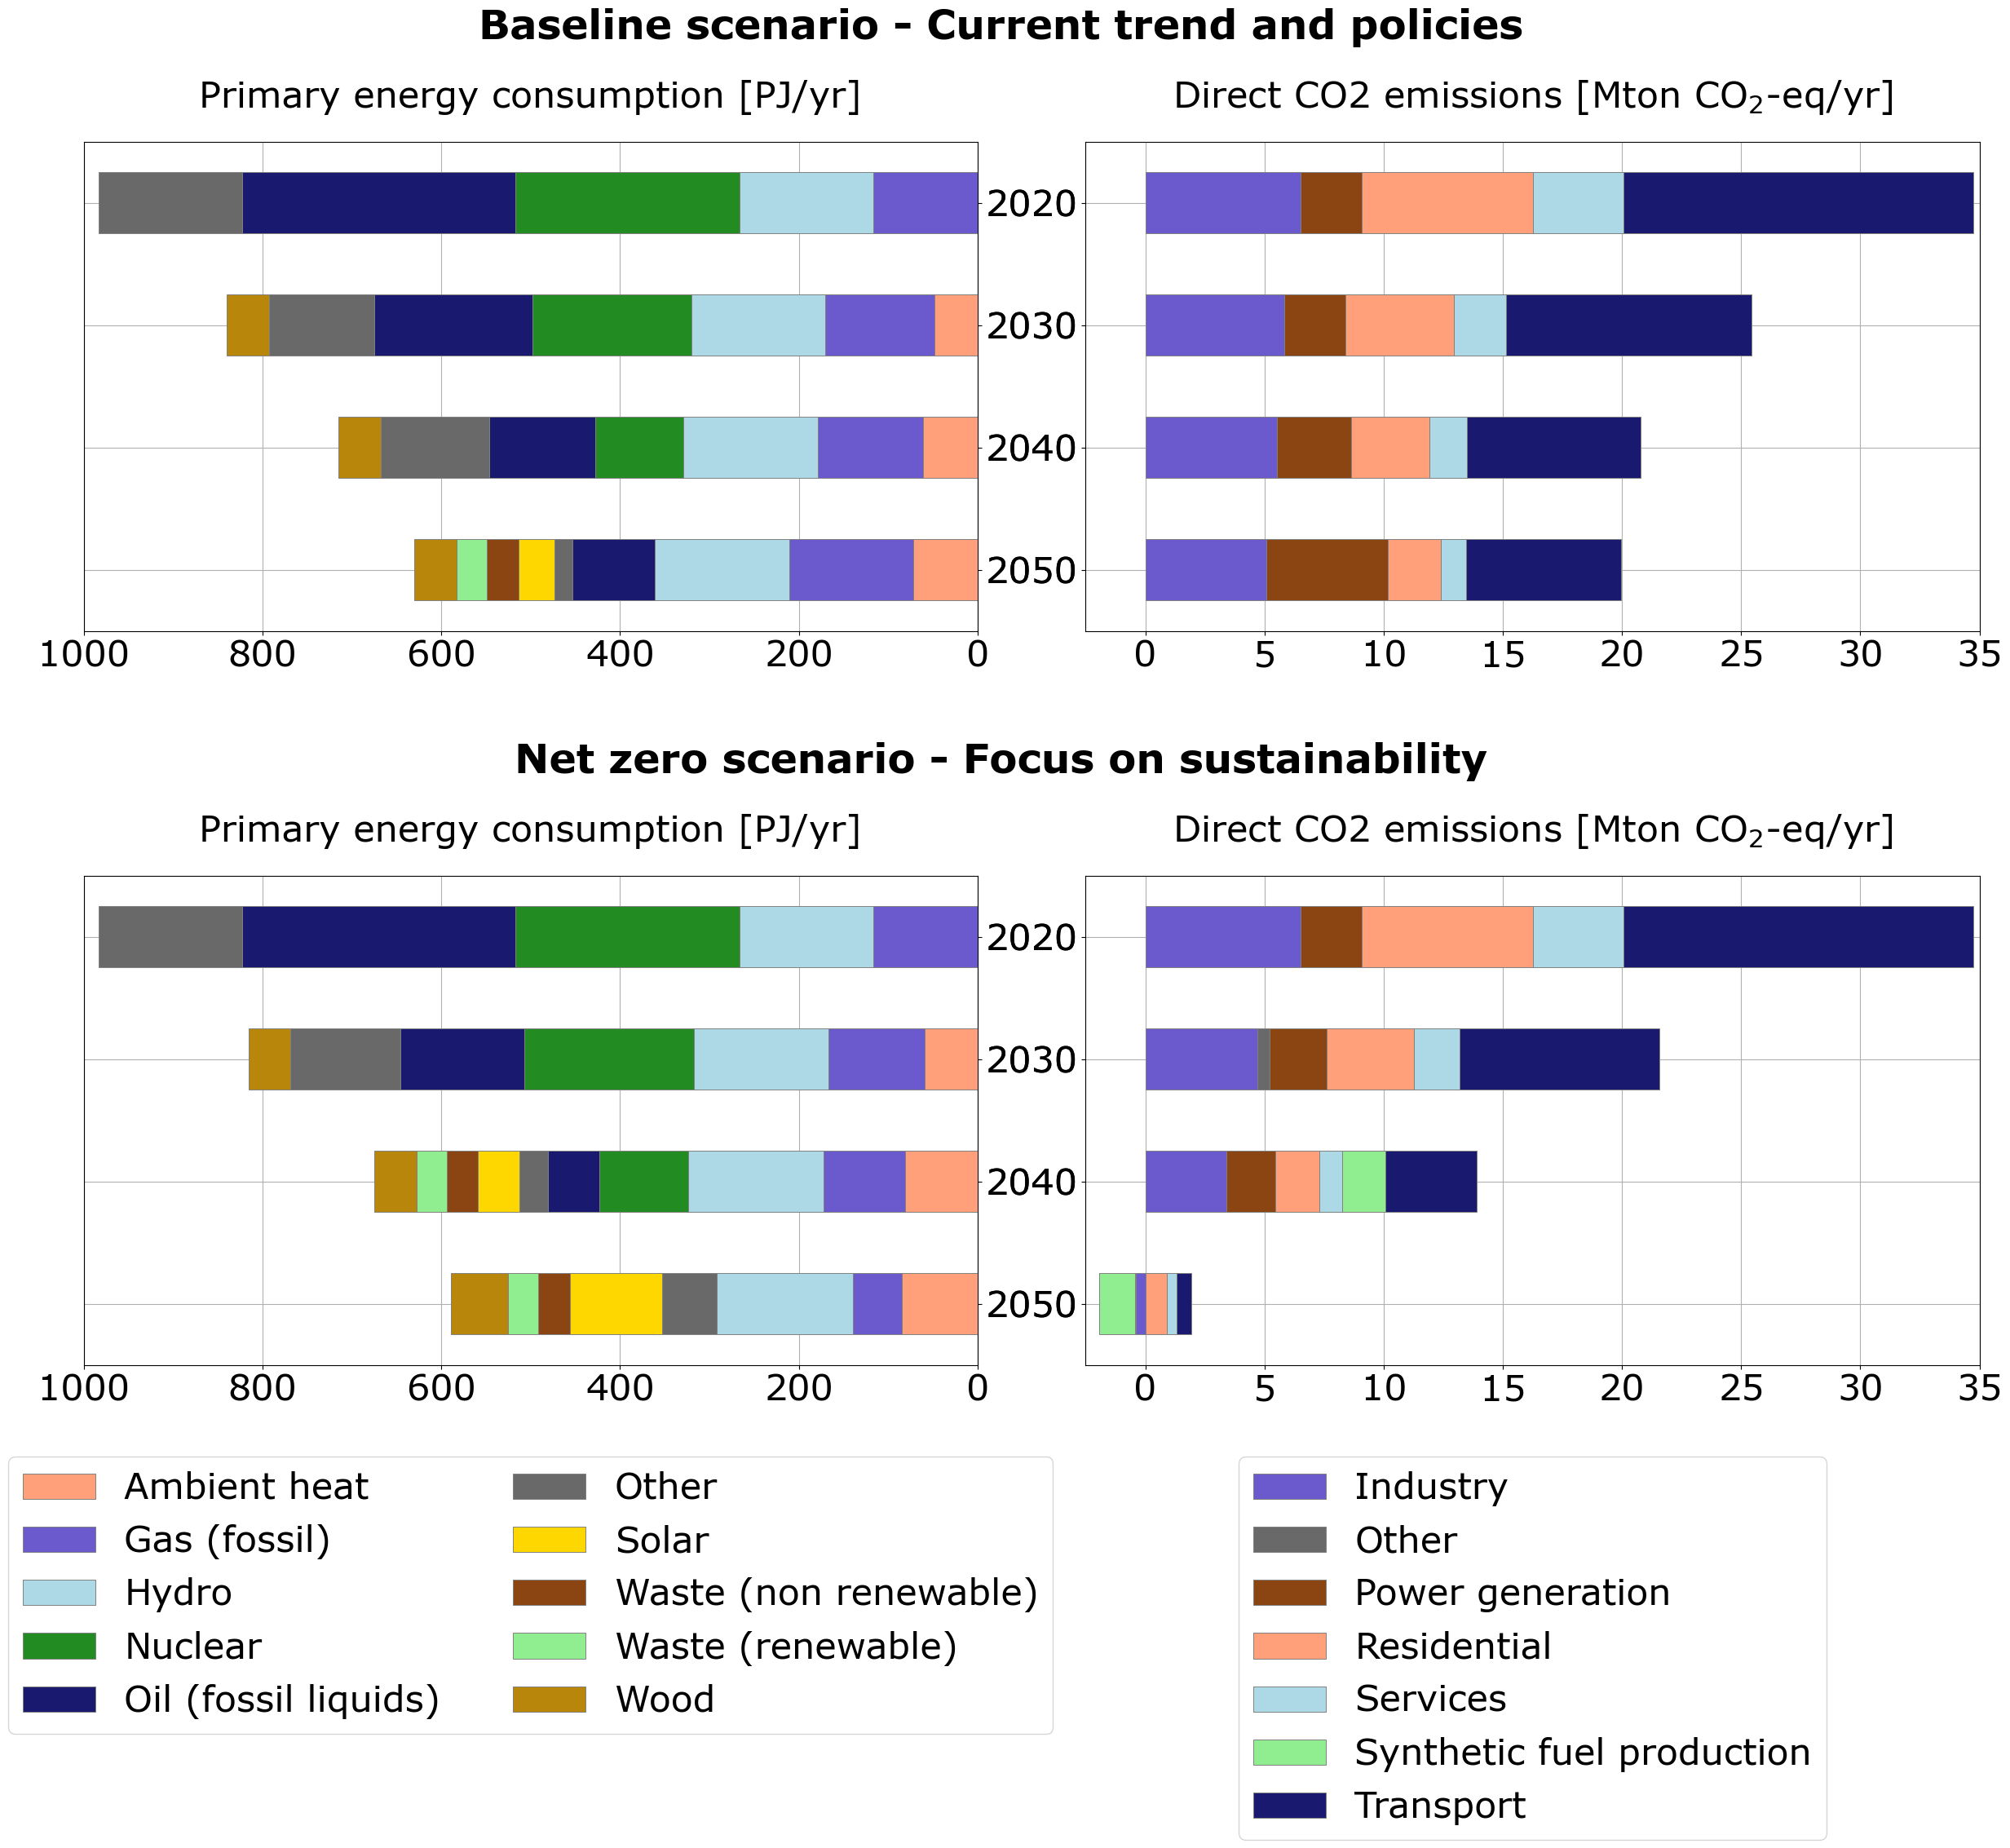

In [17]:
# Pivot the data to aggregate values per year and sector
df_sources_pivot_sps1 = df_sps1_sources_melted.pivot(index='Year', columns='Sector', values='Value').fillna(0)
df_emissions_pivot_sps1 = df_sps1_emissions_melted.pivot(index='Year', columns='Sector', values='Value').fillna(0)
df_sources_pivot_sps4 = df_sps4_sources_melted.pivot(index='Year', columns='Sector', values='Value').fillna(0)
df_emissions_pivot_sps4 = df_sps4_emissions_melted.pivot(index='Year', columns='Sector', values='Value').fillna(0)

# Filter data to include only the years 2020, 2030, 2040, and 2050
years_to_plot = [2020, 2030, 2040, 2050]
df_sources_pivot_sps1_filtered = df_sources_pivot_sps1.loc[years_to_plot]
df_emissions_pivot_sps1_filtered = df_emissions_pivot_sps1.loc[years_to_plot]
df_sources_pivot_sps4_filtered = df_sources_pivot_sps4.loc[years_to_plot]
df_emissions_pivot_sps4_filtered = df_emissions_pivot_sps4.loc[years_to_plot]

# Set up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, sharey='row', figsize=(30, 20), gridspec_kw={'wspace': 0.121, 'hspace': 0.5})

# Plot the SPS4 data
plot_with_consistent_colors(df_sources_pivot_sps4_filtered, axs[0, 0], 'Primary energy consumption [PJ/yr]', (1000, 0), sector_colors_sources)
axs[0, 0].invert_yaxis()
axs[0, 0].set_ylabel('')

plot_with_consistent_colors(df_emissions_pivot_sps4_filtered, axs[0, 1], 'Direct CO2 emissions [Mton CO$_2$-eq/yr]', (-2.5, 35), sector_colors_emissions)
axs[0, 1].invert_yaxis()
axs[0, 1].set_ylabel('')

axs[0, 0].legend().remove()  # Remove legend for the upper left plot
axs[0, 1].legend().remove()  # Remove legend for the upper right plot


# Plot the SPS1 data
plot_with_consistent_colors(df_sources_pivot_sps1_filtered, axs[1, 0], 'Primary energy consumption [PJ/yr]', (1000, 0), sector_colors_sources)
axs[1, 0].invert_yaxis()
axs[1, 0].set_ylabel('')


plot_with_consistent_colors(df_emissions_pivot_sps1_filtered, axs[1, 1], 'Direct CO2 emissions [Mton CO$_2$-eq/yr]', (-2.5, 35), sector_colors_emissions)
axs[1, 1].invert_yaxis()
axs[1, 1].set_ylabel('')
axs[1, 1].tick_params(right=False, labelright=False)  # Hide y-ticks and labels for the right plot

# Add legends under the lower plots
axs[1, 0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=32, ncol=2)
axs[1, 1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=32, ncol=1)

# Hide y-ticks and labels for the left plots
axs[0, 0].tick_params(left=False, labelleft=False)  # Upper left plot
axs[1, 0].tick_params(left=False, labelleft=False)  # Lower left plot

# Ensure y-ticks and labels for the right plots are visible
axs[0, 1].tick_params(left=True, labelleft=True, right=False, labelright=False)  # Upper right plot
axs[1, 1].tick_params(left=True, labelleft=True, right=False, labelright=False)  # Lower right plot

# Adjust y-ticks to be centered between the plots
axs[0, 0].yaxis.set_ticks_position('right')
axs[0, 0].yaxis.set_label_position('right')
axs[0, 1].yaxis.set_ticks_position('left')
axs[1, 0].yaxis.set_ticks_position('right')
axs[1, 0].yaxis.set_label_position('right')
axs[1, 1].yaxis.set_ticks_position('left')

# Add titles to the scenarios
fig.text(0.5, 0.97, 'Baseline scenario - Current trend and policies', ha='center', va='center', fontsize=36, weight='bold')
fig.text(0.5, 0.52, 'Net zero scenario - Focus on sustainability', ha='center', va='center', fontsize=36, weight='bold')

# Adjust layout and show the plot
# plt.tight_layout()
plt.subplots_adjust(top=0.90, bottom=0.15)
plt.savefig('scenario_results.png', dpi=300, bbox_inches='tight')
plt.show()